In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw11.ok')

Assignment: Homework 11: Regression Inference
OK, version v1.12.5



# Homework 11: Regression Inference

**Reading**: 

* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 11 is due **Thursday, 4/23 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 4/22 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp20/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from client.api.notebook import Notebook
ok = Notebook('hw11.ok')

Assignment: Homework 11: Regression Inference
OK, version v1.12.5



## Regression Inference for the NFL Draft

In this homework, we will be analyzing the relationship between draft position and success in the NFL. The NFL draft is an annual event in which every NFL team takes turns choosing players that they will add to their team. There are around 200 selections, called "picks" made every year, although this number has changed over the years.

The `nfl` table has five columns, the name of the `Player`, the `Salary` that player made for the 2019 season, the year that player was drafted (`Year Drafted`), the number of the draft pick that was used when the player was drafted (`Pick Number`), and the `Position` in football that player plays.

Each row in `nfl` corresponds to one player who played in the **2019 season**.

In [3]:
# Just run this cell!
nfl = Table.read_table("nfl.csv")
nfl.show(5)

Player,Salary,Year Drafted,Pick Number,Position
Baker Mayfield,570000,2018,1,QB
Cam Newton,16200000,2011,1,QB
Eli Manning,11500000,2004,1,QB
Eric Fisher,10350000,2013,1,OT
Jadeveon Clowney,15967200,2014,1,DE


#### Question 1

Add a column to the table called `Career Length` that corresponds to how long a player has been in the NFL to the `nfl` table. `Career Length` is from when they were drafted to this year, 2020. So, if a player was drafted in 2015, their career length is 5:
$$2020-2015=5$$

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [4]:
nfl = nfl.with_column("Career Length", 2020 - nfl.column("Year Drafted"))
nfl.show(5)

Player,Salary,Year Drafted,Pick Number,Position,Career Length
Baker Mayfield,570000,2018,1,QB,2
Cam Newton,16200000,2011,1,QB,9
Eli Manning,11500000,2004,1,QB,16
Eric Fisher,10350000,2013,1,OT,7
Jadeveon Clowney,15967200,2014,1,DE,6


In [5]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



As usual, let's investigate our data visually before analyzing it numerically. The first relationship we will analyze is the relationship between a player's `Pick Number` and their `Career Length`. Run the following cell to see a scatter diagram with the line of best fit already plotted for you.

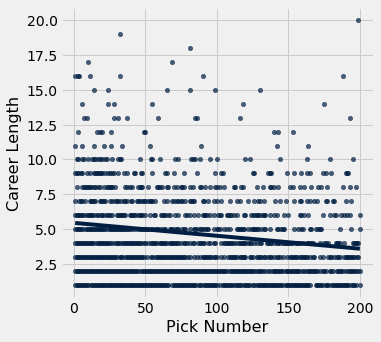

In [6]:
# Just run this cell
nfl.scatter("Pick Number", "Career Length", fit_line=True)

#### Question 2

Use the functions given to assign the correlation between `Pick Number` and `Career Length` to `pick_length_correlation`. `correlation` takes in three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [7]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)

def correlation(tbl, col1, col2):
    return np.mean(standard_units(tbl.column(col1)) * standard_units(tbl.column(col2)))

pick_length_correlation = correlation(nfl, "Pick Number", "Career Length")
pick_length_correlation

-0.16517332737646848

In [8]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We can see that there is a negative association between `Pick Number` and `Career Length`! If in the sample, we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

#### Question 3

Evan thinks that the slope of the true line of best fit for `Pick Number` and `Career Length` is not zero: that is, there is some correlation/association between `Pick Number` and `Career Length`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

*Null hypothesis is the slope of the true line of best fit for Pick Number and Carrer Length is zero

Alternate hypothesis is the slope of the true of the best fit of Pick Number and Carrer Length is non zero.*

#### Question 4

Saurav says that instead of finding the slope for each resample, we can find the correlation instead, and that we will get the same result. Why is he correct? What is the relationship between slope and correlation?

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

*We can interprete correlation coefficient like If both Y and X are standardized by subtracting their means and dividing by their standard deviations, the correlation is the slope of the regression of the standardized Y on the standardized X. The reason is just look at the formula of slope. The slope is 0 when r is 0, and when X and Y do not have relationship or r = 0, then the regression line should be horizontal line, which is its slope is 0.*

#### Question 5
Define the function `one_resample_r` that performs a bootstrap and finds the correlation between `Pick Number` and `Career Length` in the resample. `one_resample_r` should take three arguments, a table `tbl` and the labels of the columns you are finding the correlation between, `col1` and `col2`.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [9]:
def one_resample_r(tbl, col1, col2):
    resample = tbl.sample()
    return correlation(resample, col1, col2)

# Don't change this line below!
one_resample = one_resample_r(nfl, "Pick Number", "Career Length")
one_resample

-0.17033644263140332

In [10]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6

Generate 1000 bootstrapped correlations for `Pick Number` and `Career Length`, store your results in the array `resampled_correlations_pc`, and plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

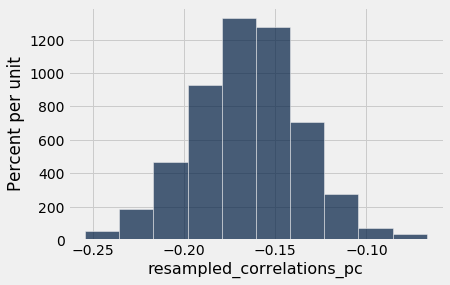

In [11]:
resampled_correlations_pc = make_array()
for i in np.arange(1000):
    one_sim = one_resample_r(nfl, "Pick Number", "Career Length")
    resampled_correlations_pc = np.append(
    resampled_correlations_pc, one_sim)
Table().with_column("resampled_correlations_pc", 
                    resampled_correlations_pc).hist()


#### Question 7

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [12]:
lower_bound_pc = percentile(2.5, resampled_correlations_pc)
upper_bound_pc = percentile(97.5, resampled_correlations_pc)
reject = True

# Don't change this!
print(f"95% CI: [{lower_bound_pc}, {upper_bound_pc}] , Reject the null: {reject}")

95% CI: [-0.22793721647670653, -0.10824094648515446] , Reject the null: True


In [13]:
ok.grade("q1_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now let's investigate the relationship between `Pick Number` and `Salary`. As usual, let's inspect our data visually first. A line of best fit is plotted for you.

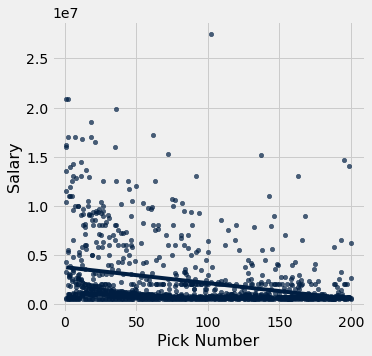

In [14]:
# Just run this cell!
nfl.scatter("Pick Number", "Salary", fit_line=True)

#### Question 8

Using the function `correlation`, find the correlation between `Pick Number` and `Salary` and assign it to `pick_salary_correlation`.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [15]:
pick_salary_correlation = correlation(nfl, "Pick Number", "Salary")
pick_salary_correlation

-0.2812388644684761

In [16]:
ok.grade("q1_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We can see that there is a negative association between `Pick Number` and `Salary`! 

#### Question 9

Once again, Evan thinks that the slope of the true line of best fit for `Pick Number` and `Salary` is not zero: that is, there is some correlation/association between `Pick Number` and `Salary`. To test this claim, we can run a hypothesis test! Define the null and alternative hypothesis for this test.


<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

*Null hypothesis is the slope of the true line of best fit for Pick Number and Salary is zero
Alternate hypothesis is the slope of the true of the best fit of Pick Number and Salary is non zero.*

#### Question 10

Generate 1000 bootstrapped correlations for `Pick Number` and `Salary`, append them to the array `resampled_correlations_salary`, and then plot a histogram of your results.

<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

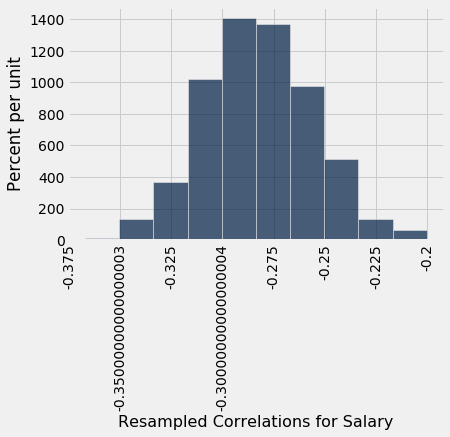

In [20]:
resampled_correlations_salary = make_array()
for i in np.arange(1000):
    one_simulate = one_resample_r(nfl, "Pick Number", "Salary")
    resampled_correlations_salary = np.append(
    resampled_correlations_salary, one_simulate)

Table().with_column("Resampled Correlations for Salary", resampled_correlations_salary).hist()

#### Question 11

Calculate a 95% confidence interval for the resampled correlations and assign either `True` or `False` to `reject_sal` if we can reject the null hypothesis or if we cannot reject the null hypothesis using a 5% p-value cutoff.


<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [21]:
lower_bound_sal = percentile(2.5, resampled_correlations_salary)
upper_bound_sal = percentile(97.5, resampled_correlations_salary)
reject_sal = True

# Don't change this!
print(f"95% CI: [{lower_bound_sal}, {upper_bound_sal}], Reject the null: {reject_sal}")

95% CI: [-0.3323581415762883, -0.2299287142215751], Reject the null: True


In [22]:
ok.grade("q1_11");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Analyzing Residuals

Next, Evan wants to predict his Career Length and Salary based on his Pick Number. To understand what his Career Length and Salary might be, Evan wants to generate confidence intervals of possible values for both career length and salary. First, let's investigate how effective our predictions for career length and salary based on pick number are.

#### Question 12

Calculate the slope and intercept for the line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`. Assign these values to `career_length_slope`, `career_length_intercept`, `salary_slope`, and `salary_intercept` respectively. The function `parameters` returns a two-item array containing the slope and intercept of a linear regression line.

*Hint 1: Use the `parameters` function with the arguments specified!*

*Hint 2: Remember we're predicting career length and salary **based off** a pick number. That should tell you what the `colx` and `coly` arguments you should specify when calling `parameters`.*

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [23]:
# DON'T EDIT THE PARAMETERS FUNCTION
def parameters(tbl, colx, coly):
    x = tbl.column(colx)
    y = tbl.column(coly)
    r = correlation(tbl, colx, coly)
    slope = r * np.std(y)/np.std(x)
    intercept = np.mean(y) - slope*np.mean(x)
    return make_array(slope, intercept)

career_length_slope = parameters(nfl, "Pick Number", "Career Length").item(0)
career_length_intercept = parameters(nfl, "Pick Number", "Career Length").item(1)

salary_slope = parameters(nfl, "Pick Number", "Salary").item(0)
salary_intercept = parameters(nfl, "Pick Number", "Salary").item(1)


In [24]:
ok.grade("q1_12");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 13

Draw a scatter plot of the residuals for each line of best fit for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`.

*Hint: We want to get the predictions for every player in the dataset*

*Hint 2: This question is really involved, try to follow the skeleton code!*

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->
<!-- EXPORT TO PDF -->

In [25]:
nfl

Player,Salary,Year Drafted,Pick Number,Position,Career Length
Baker Mayfield,570000,2018,1,QB,2
Cam Newton,16200000,2011,1,QB,9
Eli Manning,11500000,2004,1,QB,16
Eric Fisher,10350000,2013,1,OT,7
Jadeveon Clowney,15967200,2014,1,DE,6
Jameis Winston,20922000,2015,1,QB,5
Jared Goff,4259683,2016,1,QB,4
Kyler Murray,495000,2019,1,QB,1
Matthew Stafford,13500000,2009,1,QB,11
Myles Garrett,3229750,2017,1,DE,3


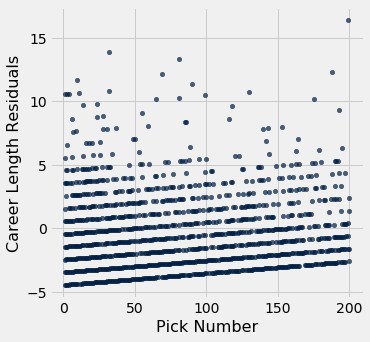

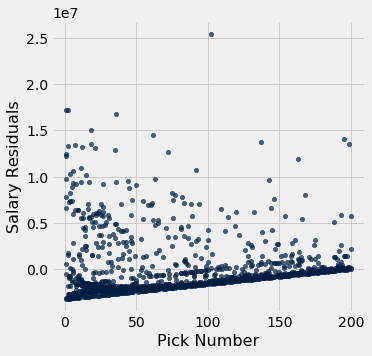

In [26]:
predicted_career_lengths = career_length_slope*nfl.column(
    "Pick Number")+career_length_intercept
predicted_salaries = salary_slope*nfl.column("Pick Number")+salary_intercept


career_length_residuals = nfl.column("Career Length") - predicted_career_lengths
salary_residuals = nfl.column("Salary") - predicted_salaries

nfl_with_residuals = nfl.with_columns("Career Length Residuals", career_length_residuals,
                                     "Salary Residuals", salary_residuals)

# Now generate two scatter plots!
nfl_with_residuals.scatter("Pick Number", "Career Length Residuals")
nfl_with_residuals.scatter("Pick Number", "Salary Residuals")

Here's a [link](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html) to properties of residuals in the textbook that could help out with some questions.

#### Question 14

Based on these plots of residuals, do you think linear regression is a good model for `Pick Number` vs `Career Length` and for `Pick Number` vs `Salary`? Explain for both.

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->
<!-- EXPORT TO PDF -->

*Based on the plots, I can say that both of model is not good.

The first one is plot of residual of "Pick Number and Career Length" make a pattern of all residual under 0 make a increasing line patterns, and over x = 0, I got the lines as well with some hight point residual

For the residual plot of "Pick Number" and "Salary", I notice that under x = 0 most of residual made a increasing line and upper x = 0, residual point spread out upward.*

#### Question 15

Assign `career_length_residual_corr` and `salary_residual_corr` to either 1, 2 or 3 corresponding to whether or not the correlation between `Pick Number` and `Career Length Residuals` is positive, zero, or negative, and to whether or not the correlation between `Pick Number` and `Salary Residuals` is positive, zero, or negative respectively.

1. Positive
2. Zero
3. Negative

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [35]:
career_length_residual_corr = 2
salary_residual_corr = 2

In [61]:
ok.grade("q1_15");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



It looks like the largest residuals are positive residuals, so let's investigate those more closely.

#### Question 16

Let's investigate where our regression line is making errors. Using the `nfl_with_residuals` table, assign `greatest_career_length_residual` to the string that is the name of the player with the largest positive residual for `Pick Number` vs `Career Length`.


<!--
BEGIN QUESTION
name: q1_16
manual: false
-->

In [27]:
nfl_with_residuals

Player,Salary,Year Drafted,Pick Number,Position,Career Length,Career Length Residuals,Salary Residuals
Baker Mayfield,570000,2018,1,QB,2,-3.44458,-3.14663e+06
Cam Newton,16200000,2011,1,QB,9,3.55542,1.24834e+07
Eli Manning,11500000,2004,1,QB,16,10.5554,7.78337e+06
Eric Fisher,10350000,2013,1,OT,7,1.55542,6.63337e+06
Jadeveon Clowney,15967200,2014,1,DE,6,0.555416,1.22506e+07
Jameis Winston,20922000,2015,1,QB,5,-0.444584,1.72054e+07
Jared Goff,4259683,2016,1,QB,4,-1.44458,543051
Kyler Murray,495000,2019,1,QB,1,-4.44458,-3.22163e+06
Matthew Stafford,13500000,2009,1,QB,11,5.55542,9.78337e+06
Myles Garrett,3229750,2017,1,DE,3,-2.44458,-486882


In [29]:
max_len = nfl_with_residuals.where("Career Length Residuals", max(
    nfl_with_residuals.column("Career Length Residuals")))
greatest_career_length_residual = max_len.column("Player").item(0)
greatest_career_length_residual 


'Tom Brady'

In [30]:
ok.grade("q1_16");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now let's investigate the residuals for salary. Run the cell below to see the players with the largest residuals for `Pick Number` vs `Salary`.

In [84]:
# Just run this cell!
nfl_with_residuals.sort("Salary Residuals", descending=True).take(np.arange(10)).drop(2,6)

Player,Salary,Pick Number,Position,Career Length,Salary Residuals
Kirk Cousins,27500000,102,QB,8,2.54226e+07
Marcus Mariota,20922000,2,QB,5,1.72216e+07
Jameis Winston,20922000,1,QB,5,1.72054e+07
Derek Carr,19900000,36,QB,6,1.67514e+07
Joe Flacco,18500000,18,QB,12,1.50593e+07
Jimmy Garoppolo,17200000,62,QB,6,1.44734e+07
Antonio Brown,14625000,195,WR,10,1.4057e+07
Grady Jarrett,15209000,137,DT,5,1.36996e+07
Melvin Ingram,17000000,18,DE,8,1.35593e+07
Tom Brady,14000000,199,QB,20,1.34969e+07


#### Question 17

What patterns do you notice with these large residuals for salary? How could this affect our analysis?


<!--
BEGIN QUESTION
name: q1_17
manual: true
-->
<!-- EXPORT TO PDF -->

*After looking at 2.54226e+07 and 27500000, I found that the error of Salary prediction from observed salary is extremelly high. The outlier is very big, or we can say the point at Pick Number at 102 is so far from the regrestion line. some next other high of salary Residual, there are some clutters of big error of prediction line and actual value. The pattern look like outliers are everywhere.

These big errors from outliers would lead an unreliable liear regression line.*

## Prediction Intervals

Now, Evan wants to predict his career length based on his specific pick number, which is 169. Instead of using the best fit line generated from the sample, Evan wants to generate an interval for his predicted career length.

#### Question 18

Define the function `one_resample_prediction` that generates a bootstrapped sample from the `tbl` argument, calculates the line of best fit for `ycol` vs `xcol` for that resample, and predicts a value based on `xvalue`.

*Hint: Remember you defined the `parameters` function earlier*


<!--
BEGIN QUESTION
name: q1_18
manual: false
-->

In [31]:
def one_resample_prediction(tbl, colx, coly, xvalue):
    resample = tbl.sample()
    p = parameters(resample, colx, coly)
    return p.item(0)*xvalue+p.item(1)

evans_career_length_pred = one_resample_prediction(nfl, "Pick Number", "Career Length", 169)
evans_career_length_pred

4.113290003249416

In [32]:
ok.grade("q1_18");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 19

Assign `resampled_predictions` to be an array that will contain 1000 resampled predictions for Evan's career length based on his pick number, and then generate a histogram of it.


<!--
BEGIN QUESTION
name: q1_19
manual: true
-->
<!-- EXPORT TO PDF -->

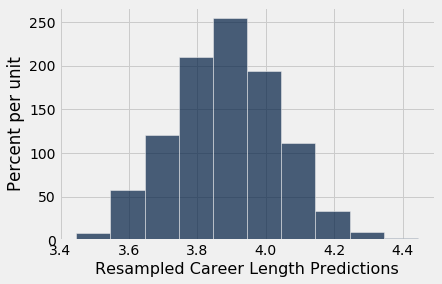

In [34]:
resampled_predictions = make_array()
for i in np.arange(1000):
    one_simulate = one_resample_prediction(nfl, "Pick Number", "Career Length", 169)
    resampled_predictions = np.append(resampled_predictions, one_simulate)


# Don't change/delete the code below in this cell
Table().with_column("Resampled Career Length Predictions", resampled_predictions).hist()

#### Question 20

Using `resampled_predictions` from Question 19, generate a 99% confidence interval for Evan's predicted career lengths.


<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [38]:
lower_bound_evan = percentile(0.5, resampled_predictions)
upper_bound_evan = percentile(99.5, resampled_predictions)

# Don't delete/modify the code below in this cell
print(f"99% CI: [{lower_bound_evan}, {upper_bound_evan}]")

99% CI: [3.533954620711736, 4.287555647476686]


In [36]:
ok.grade("q1_20");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Run the following cell to see a few bootstrapped regression lines, and the predictions they make for a career length from a pick number of 169.

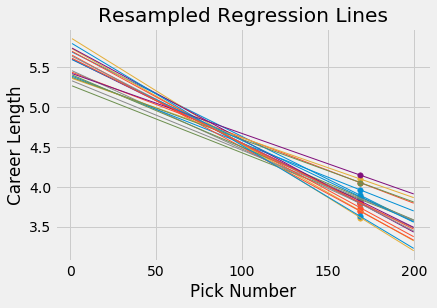

In [37]:
# Just run this cell! 
# You don't need to understand all of what it is doing but you should recognize a lot of the code!
lines = Table(['slope','intercept'])
x=169
for i in np.arange(20):
    resamp = nfl.sample(with_replacement=True)
    resample_pars = parameters(resamp, "Pick Number", "Career Length") 
    slope = resample_pars.item(0)
    intercept = resample_pars.item(1)
    lines.append([slope, intercept])
    
lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')
xlims = [min(nfl.column("Pick Number")), max(nfl.column("Pick Number"))]
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']
for i in range(20):
    plt.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plt.scatter(x, fit_x[i], s=30)
plt.ylabel("Career Length");
plt.xlabel("Pick Number");
plt.title("Resampled Regression Lines");

#### Question 21

Does the Central Limit Theorem guarantee that the bootstrapped slopes or bootstrapped correlations will be normally distributed for any dataset that uses a large random sample? If you think yes, assign `True` to `clt_applies`, otherwise assign `False` to `clt_applies` if you think no. Are residuals normally distributed? If you think they are, assign `True` to `residuals_normal`, otherwise assign `False` to `residuals_normal`.


<!--
BEGIN QUESTION
name: q1_21
manual: false
-->

In [40]:
clt_applies = False
residuals_normal = False

In [41]:
ok.grade("q1_21");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 22

What are some biases in this dataset that may have affected our analysis? Some questions you can ask yourself are: "is our sample a simple random sample?" or "what kind of data are we using/what variables are we dealing with: are they categorical, numerical, or both (both is something like ordinal data)?".

*Hint: you might want to revisit the beginning of this assignment to reread how this data/`nfl` table was generated.*


<!--
BEGIN QUESTION
name: q1_22
manual: true
-->
<!-- EXPORT TO PDF -->

*I think there are some biases in this dataset that have affected my analysis, one of them is every NFL team takes turns choosing players that they will add to their team, they would tend to choose the person who they like or they know. 

Another reason is racism, they may pick the person who the same their color sknin or they pick players depend on players' name who have the similar name that they want

I believe that a lot of biases in this test.*

## (OPTIONAL, Out of Scope) Extending Linear Regression

This following section is completely **optional**, meaning there's no code to be graded/filled in. Just run the cells/explore if you're interested.

In the past few weeks you have learned one of the most powerful tools in a data scientist's arsenal: regression. At this point you may be wondering: what do we do when our data is not linear? You have learned that you shouldn't try and force models when they are bad fits: for example, if we detect heteroscedasticity in our residuals plot, we know that linear regression is a bad fit.

How can we fit data that is not linear then?

Let's increase our data's complexity a little: instead of linear data, let's look at data that you would naturally model with a parabola instead:

In [47]:
def parabola(x, a=1, b=0, c=0):
    random_noise = np.random.normal(size=len(x)) * 3
    return  a*(x**2) + b*(x) + c + random_noise

size = 500
x_values = np.random.uniform(-5, 10, size=size)
y_values = parabola(x_values, a=2, b=-3, c=5)

Table().with_columns("X", x_values, "Y", y_values).scatter("X","Y", fit_line=True)

You can see that our line of best fit is a poor match for this data. Let's look at the residual plot:

In [48]:
def mse(slope, intercept):
    predicted_y = slope * x_values + intercept
    errors = y_values - predicted_y
    return np.mean(errors**2)


slope_and_intercept = minimize(mse, smooth=True)
predicted_y = slope_and_intercept.item(0) * x_values + slope_and_intercept.item(1)
residuals = y_values - predicted_y

Table().with_columns("X", x_values, "Residuals",residuals).scatter("X", "Residuals")

Our residuals clearly have a pattern, confirming that linear regression is a bad fit for this data! In fact, our residuals actually look like our original data.

Linear regression generates a line that minimizes mean squared error. Using the `minimize` function on the `mse` function does all the work of finding values for us! Can we use `minimize` for more complicated models? Yes! In future data science classes, you will learn how to find these values yourself using the mathematical fields of Linear Algebra (note that it involves lines!) and calculus!

Let's take a look at the equation for a line:

$$y = ax +b$$

There are two parameters here that we can change: $a$, which is the slope, and $b$, which is the intercept.

How about the equation for a parabola?

$$y = ax^2 + bx + c$$

Now there are three parameters, $a,b,c$.

Let's change our mse function to incorporate these three parameters!

In [49]:
def mse_parabola(a, b, c):
    predicted_y = a * (x_values**2) + b * (x_values) + c
    errors = y_values - predicted_y
    return np.mean(errors**2)

The function still returns the mean squared error of our predicted curve, just our curve is now a parabola with the parameters `a`, `b`, and `c`. Let's try and minimize this function!

In [50]:
params = minimize(mse_parabola, smooth=True)
a = params.item(0)
b = params.item(1)
c = params.item(2)
a, b, c

Let's plot our new curve with these values!

In [51]:
x_values_range = np.linspace(-5, 10, 1000)
predicted_y = a * (x_values_range**2) + b * (x_values_range) + c

Table().with_columns("X", x_values, "Y", y_values).scatter("X", "Y")
plt.plot(x_values_range, predicted_y, color='gold', markersize=1);

Our curve looks like a much better fit now! Let's double check the residuals plot to be sure.

In [52]:
residuals = y_values - (a * (x_values**2) + b * (x_values) + c)
Table().with_columns("X", x_values, "Residuals", residuals).scatter("X", "Residuals")

A formless cloud, excellent!

What else can the method of least squares do?

Can we predict a single variable based on the values of two other variables? Right now, we don't have a way of doing that. 

If you look at the previous example, you could say that the $x^2$ term is actually a second variable.

Let's generate a dataset to work with. We are going to try and predict `z` based on `x` and `y`.

In [53]:
x_values_range = np.linspace(-5, 10, 1000)

x = 0.5 * np.random.uniform(-5, 10, size=size) + 3
y = np.random.uniform(-5, 10, size=size) - 1
z = 3*x  + (-2*y) -4 + np.random.normal(size=size)

data = Table().with_columns("x", x, "y", y, "z", z)
data.scatter("x", "y")
data.scatter("x", "z")
data.scatter("y", "z")

We can see that `x` and `y` would both be very helpful to predict `z` by themselves! However, if we combined them we could predict `z` even better. Since our goal is to minimize mean squared error, let's find the mean squared error of the models that only use `x` and `y` by themselves (using an intercept).

In [54]:
from scipy import stats
def su(x):
    return (x-np.mean(x)) / np.std(x)
def r(x, y):
    return np.mean(su(x) * su(y))

def mse_x(slope, intercept):
    predicted_z = slope * x + intercept
    errors = z - predicted_z
    return np.mean(errors**2)

def mse_y(slope, intercept):
    predicted_z = slope * y + intercept
    errors = z - predicted_z
    return np.mean(errors**2)


slope_and_intercept_x = minimize(mse_x, smooth=True)
predicted_z_x = slope_and_intercept_x.item(0) * x + slope_and_intercept_x.item(1)
residuals_x = z - predicted_z_x

Table().with_columns("X", x, "Residuals for X Model", residuals_x).scatter("X", "Residuals for X Model")

slope_and_intercept_y = minimize(mse_y, smooth=True)
predicted_z_y = slope_and_intercept_y.item(0) * y + slope_and_intercept_y.item(1)
residuals_y = z - predicted_z_y

Table().with_columns("Y", y, "Residuals for Y Model", residuals_y).scatter("Y", "Residuals for Y Model")

Both of the residual plots show no trend, so using these `x` or `y` by themselves would work, but how good are these models? Let's calculate their actual mse.

In [55]:
x_only_mse = mse_x(slope_and_intercept_x.item(0), slope_and_intercept_x.item(1))
y_only_mse = mse_y(slope_and_intercept_y.item(0), slope_and_intercept_y.item(1))

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}")

Looks like the y only model has lower MSE, so we should try and use that if we can only use `x` or `y`. 

Instead, let's try to build a model that is a combination of `x`, `y` and an intercept `c` to predict `z`!

$$z = ax + by +c$$

In [56]:
def mse_both(a, b, c):
    predicted_z = (a * x) + (b * y) + c
    errors = z - predicted_z
    return np.mean(errors**2)

slope_and_intercept_both = minimize(mse_both, smooth=True)
predicted_z = (slope_and_intercept_both.item(0) * x) + (slope_and_intercept_both.item(1) * y) + slope_and_intercept_both.item(2)
residuals = z - predicted_z

Table().with_columns("X", x, "Residuals for Full Model", residuals).scatter("X", "Residuals for Full Model")
Table().with_columns("Y", x, "Residuals for Full Model", residuals).scatter("Y", "Residuals for Full Model")

This model is also a good fit looking at the residuals with respect to both `x` and `y`! What is this model's mse?

In [57]:
full_model_mse = mse_both(slope_and_intercept_both.item(0), slope_and_intercept_both.item(1), slope_and_intercept_both.item(2))

print(f"X only model MSE: {x_only_mse}, Y only model MSE: {y_only_mse}, Both X and Y MSE: {full_model_mse}")

That MSE is much lower! We should definitely use this model instead of either the x only or y only model independently!
Let's try and visualize what this model looks like with a 3D graph!

In [58]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,7));
ax = fig.add_subplot(111, projection='3d');
ax.scatter(x, y, z);
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

ax.scatter(x,y,predicted_z);

Once we start working in more dimensions, visualization becomes increasingly difficult and useless. Instead of predicting a line, our prediction is actually a plane of values (the red values)!

## 2. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>

In [60]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")